Code for making twitter graphics

In [92]:
import fastf1
import fastf1.plotting as plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from plotly.io import show
from plotly.subplots import make_subplots
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1')

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("F1 Tire Degradation Analysis Environment Ready! 🏎️")

F1 Tire Degradation Analysis Environment Ready! 🏎️


In [74]:
race = fastf1.get_session(2025, "Qatar", "Race")
race.load()
ver_laps = race.laps.pick_drivers("VER").pick_quicklaps().reset_index()
pia_laps = race.laps.pick_drivers("PIA").pick_quicklaps().reset_index()
sai_laps = race.laps.pick_drivers("SAI").pick_quicklaps().reset_index()
ant_laps = race.laps.pick_drivers("ANT").pick_quicklaps().reset_index()
nor_laps = race.laps.pick_drivers("NOR").pick_quicklaps().reset_index()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
events      WARNING 	Correcting user input 'Qatar' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data

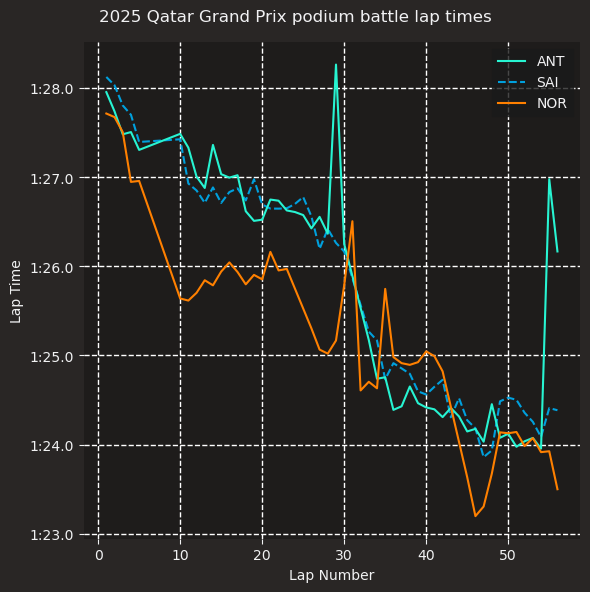

In [49]:
my_styles = [
    # style for each first driver
    {'color': 'auto', 'linewidth': 0},
    # style for each second driver
    {'color': 'auto', 'linewidth': 0}
]
fig, ax = plt.subplots(figsize=(6, 6))

for driver in ('SAI', 'ANT', 'NOR'):
    laps = race.laps.pick_drivers(driver).reset_index()
    laps = laps[laps['IsAccurate'] == True]
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

plt.suptitle("2025 Qatar Grand Prix podium battle lap times")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both', linestyle='--', linewidth=1)
sns.despine(left=True, bottom=True)
plotting.add_sorted_driver_legend(ax, race)
plt.tight_layout()
plt.show()

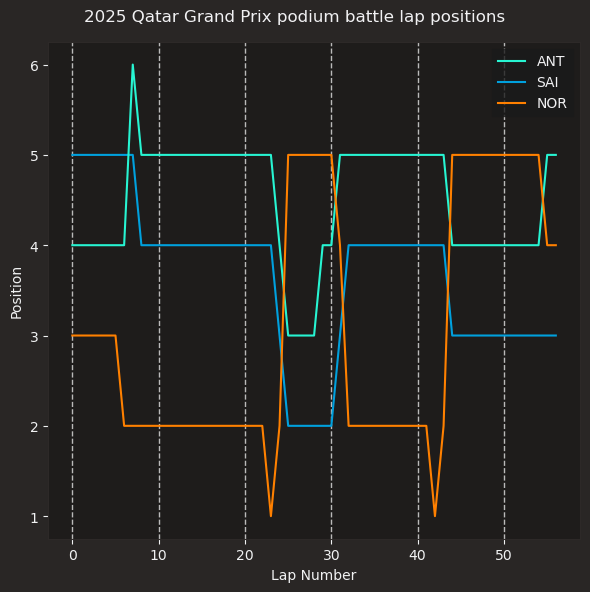

In [46]:
from matplotlib.ticker import MultipleLocator


my_styles = [
    # style for each first driver
    {'color': 'auto', 'linewidth': 0},
    # style for each second driver
    {'color': 'auto', 'linewidth': 0}
]
fig, ax = plt.subplots(figsize=(6, 6))

for driver in ('SAI', 'ANT', 'NOR'):
    laps = race.laps.pick_drivers(driver).reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color'],
                                      session=race)
    ax.plot(laps['Position'], **style, label=driver)
plt.gca().yaxis.set_major_locator(MultipleLocator(1))
ax.set_xlabel("Lap Number")
ax.set_ylabel("Position")

plt.suptitle("2025 Qatar Grand Prix podium battle lap positions")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='x', linestyle='--', linewidth=1, alpha=0.7)
#sns.despine(left=True, bottom=True)
plotting.add_sorted_driver_legend(ax, race)
plt.tight_layout()
plt.show()

# 2025 season battle for 2nd in constructors

In [50]:
season = 2025
schedule = fastf1.get_event_schedule(season, include_testing=False)

In [63]:
standings = []
# Shorten the event names by trimming Grand Prix from the name.
# This will be used to label our graph.
short_event_names = []

for _, event in schedule.iterrows():
    event_name, round_number = event["EventName"], event["RoundNumber"]
    short_event_names.append(event_name.replace("Grand Prix", "").strip())

    # Only need to load the results data
    race = fastf1.get_session(season, event_name, "R")
    race.load(laps=False, telemetry=False, weather=False, messages=False)

    # Add sprint race points if applicable
    sprint = None
    # F1 has used different names for the sprint race event format
    # From 2024 onwards, it has been "sprint_qualifying"
    # In 2023, you should match on "sprint_shootout"
    # In 2022 and 2021, you should match on "sprint"
    if event["EventFormat"] == "sprint_qualifying":
        sprint = fastf1.get_session(season, event_name, "S")
        sprint.load(laps=False, telemetry=False, weather=False, messages=False)

    for _, driver_row in race.results.iterrows():
        abbreviation, race_points, race_position, team_name = (
            driver_row["Abbreviation"],
            driver_row["Points"],
            driver_row["Position"],
            driver_row["TeamName"],
        )

        sprint_points = 0
        if sprint is not None:
            driver_row = sprint.results[
                sprint.results["Abbreviation"] == abbreviation
            ]
            if not driver_row.empty:
                # We need the values[0] accessor because driver_row is actually
                # returned as a dataframe with a single row
                sprint_points = driver_row["Points"].values[0]

        standings.append(
            {
                "EventName": event_name,
                "RoundNumber": round_number,
                "Driver": abbreviation,
                "Points": race_points + sprint_points,
                "Position": race_position,
                "Team Name": team_name
            }
        )

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
req            INFO 	Data has been written to cache!
core           INFO 	Loading data for Australian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '63', '12', '23', '18', '27', '16', '81', '44', '10', '22', '31', '87', '30', '5', '14', '55', '7', '6']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '1', '31', '12', '23', '87', '18', '55', '6', '30', '7', '5', '27', '22', '14', '16', '44', '10']
core           INFO 	Loading dat

In [66]:
df = pd.DataFrame(standings)
df.head()

,EventName,RoundNumber,Driver,Points,Position,Team Name
0,Australian Grand Prix,1,NOR,25.0,1.0,McLaren
1,Australian Grand Prix,1,VER,18.0,2.0,Red Bull Racing
2,Australian Grand Prix,1,RUS,15.0,3.0,Mercedes
3,Australian Grand Prix,1,ANT,12.0,4.0,Mercedes
4,Australian Grand Prix,1,ALB,10.0,5.0,Williams


In [ ]:
race_points = df.groupby(['RoundNumber', 'EventName', 'Team Name'])['Points'].sum().reset_index()
race_points = race_points.sort_values(by=['Team Name', 'RoundNumber'])
race_points

,RoundNumber,EventName,Team Name,Points
0,1,Australian Grand Prix,Alpine,0.0
10,2,Chinese Grand Prix,Alpine,0.0
20,3,Japanese Grand Prix,Alpine,0.0
30,4,Bahrain Grand Prix,Alpine,6.0
40,5,Saudi Arabian Grand Prix,Alpine,0.0
...,...,...,...,...
189,19,United States Grand Prix,Williams,9.0
199,20,Mexico City Grand Prix,Williams,0.0
209,21,São Paulo Grand Prix,Williams,0.0
219,22,Las Vegas Grand Prix,Williams,10.0


In [70]:
race_points['Cumulative Points'] = race_points.groupby('Team Name')['Points'].cumsum()
race_points

,RoundNumber,EventName,Team Name,Points,Cumulative Points
0,1,Australian Grand Prix,Alpine,0.0,0.0
10,2,Chinese Grand Prix,Alpine,0.0,0.0
20,3,Japanese Grand Prix,Alpine,0.0,0.0
30,4,Bahrain Grand Prix,Alpine,6.0,6.0
40,5,Saudi Arabian Grand Prix,Alpine,0.0,6.0
...,...,...,...,...,...
189,19,United States Grand Prix,Williams,9.0,111.0
199,20,Mexico City Grand Prix,Williams,0.0,111.0
209,21,São Paulo Grand Prix,Williams,0.0,111.0
219,22,Las Vegas Grand Prix,Williams,10.0,121.0


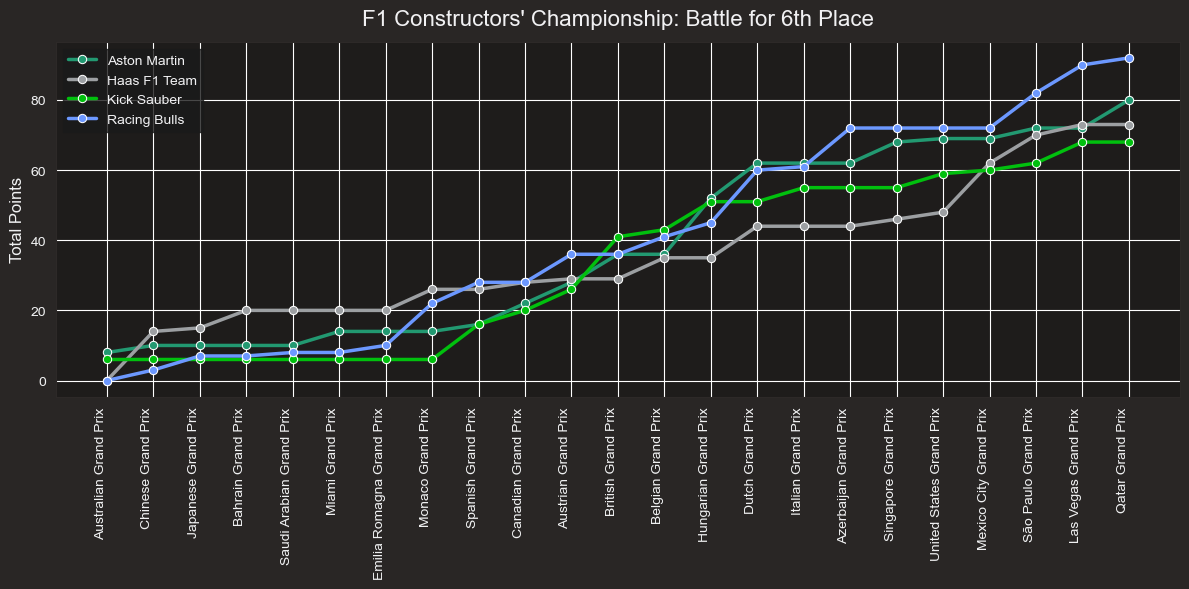

In [99]:
def graph_constructor_season(teams=[]):
    plt.figure(figsize=(12, 6))
    team_palette = {team: fastf1.plotting.get_team_color(team, session=race, colormap="official")
                    for team in race_points['Team Name'].unique()}
    if teams:
        constructor_points = race_points[race_points['Team Name'].isin(teams)]
    else:
        constructor_points = race_points
    sns.lineplot(
        data=constructor_points,
        x='RoundNumber',
        y='Cumulative Points',
        hue='Team Name',
        marker='o',
        linewidth=2.5,
        palette=team_palette
    )
    plt.title("F1 Constructors' Championship: Battle for 6th Place", fontsize=16)
    plt.xlabel('')
    plt.ylabel("Total Points", fontsize=12)
    plt.legend()

    # Optional: Set X-ticks to be the Race Names if they aren't too crowded
    unique_races = race_points[['RoundNumber', 'EventName']].drop_duplicates().sort_values('RoundNumber')
    plt.xticks(unique_races['RoundNumber'], unique_races['EventName'], rotation=90, ha='right')

    plt.tight_layout()
    plt.show()
graph_constructor_season(['Aston Martin', 'Haas F1 Team', 'Kick Sauber', 'Racing Bulls'])

In [217]:
driver_palette

{'HAM': {'color': '#ED1131', 'linestyle': 'dashed'},
 'VER': {'color': '#4781D7', 'linestyle': 'solid'},
 'LEC': {'color': '#ED1131', 'linestyle': 'solid'}}

# Season heatmap from fastf1 site

In [53]:
heatmap_data = df.pivot(
    index="Driver", columns="RoundNumber", values="Points"
).fillna(0)

# Save the final drivers standing and sort the data such that the lowest-
# scoring driver is towards the bottom
heatmap_data["total_points"] = heatmap_data.sum(axis=1)
heatmap_data = heatmap_data.sort_values(by="total_points", ascending=True)
total_points = heatmap_data["total_points"].values
heatmap_data = heatmap_data.drop(columns=["total_points"])

# Do the same for position.
position_data = df.pivot(
    index="Driver", columns="RoundNumber", values="Position"
).fillna("N/A")

In [57]:
hover_info = [
    [
        {
            "position": position_data.at[driver, race],
        }
        for race in schedule["RoundNumber"][:-1]
    ]
    for driver in heatmap_data.index
]

In [61]:
fig = make_subplots(
    rows=1,
    cols=2,
    column_widths=[0.85, 0.15],
    subplot_titles=("F1 2025 Season Summary", "Total Points"),
)
fig.update_layout(width=900, height=800)

# Per round summary heatmap
fig.add_trace(
    go.Heatmap(
        # Use the race names as x labels and the driver abbreviations
        # as the y labels
        x=short_event_names,
        y=heatmap_data.index,
        z=heatmap_data.values,
        # Use the points scored as overlay text
        text=heatmap_data.values,
        texttemplate="%{text}",
        textfont={"size": 12},
        customdata=hover_info,
        hovertemplate=(
            "Driver: %{y}<br>"
            "Race Name: %{x}<br>"
            "Points: %{z}<br>"
            "Position: %{customdata.position}<extra></extra>"
        ),
        colorscale="YlGnBu",
        showscale=False,
        zmin=0,
        # We need to set zmax for the two heatmaps separately as the
        # max value in the total points plot is significantly higher.
        zmax=heatmap_data.values.max(),
    ),
    row=1,
    col=1,
)

# Heatmap for total points
fig.add_trace(
    go.Heatmap(
        x=["Total Points"] * len(total_points),
        y=heatmap_data.index,
        z=total_points,
        text=total_points,
        texttemplate="%{text}",
        textfont={"size": 12},
        colorscale="YlGnBu",
        showscale=False,
        zmin=0,
        zmax=total_points.max(),
    ),
    row=1,
    col=2,
)

# Plot the updated heatmap
show(fig)

# H2H quali battle

In [109]:
q = fastf1.get_session(2025, "Qatar", "Q")
q.load(telemetry=True)
tsu_laps = q.laps.pick_drivers('TSU').pick_fastest().reset_index()
ver_laps = q.laps.pick_drivers('VER').pick_fastest().reset_index()
tsu_laps

events      WARNING 	Correcting user input 'Qatar' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '1', '63', '12', '6', '55', '14', '10', '16', '27', '30', '87', '5', '23', '22', '31', '44', '18', '43']


,index,317
0,Time,0 days 00:29:01.408000
1,Driver,TSU
2,DriverNumber,22
3,LapTime,0 days 00:01:20.761000
4,LapNumber,8.0
5,Stint,2.0
6,PitOutTime,NaT
7,PitInTime,NaT
8,Sector1Time,0 days 00:00:29.660000
9,Sector2Time,0 days 00:00:27.464000


In [104]:
tsu_laps = tsu_laps.groupby(['Driver', 'Stint']).first().reset_index()

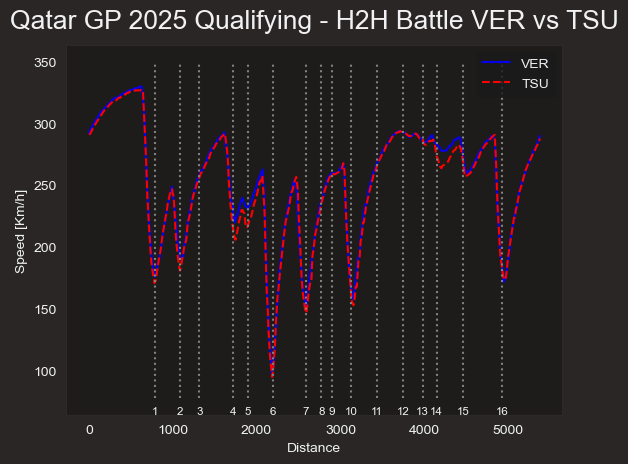

In [122]:
session_results = {}
circuit_info = q.get_circuit_info()

for driver in ['Ver', 'TSU']:
    try:
        abb = q.laps.pick_drivers(driver)['Driver'].iloc[0]
        driver_fastest = q.laps.pick_drivers(driver).pick_fastest()
        driver_fastest = driver_fastest.get_car_data().add_distance()
        t = driver_fastest['Distance']
        vCar = driver_fastest["Speed"]
        session_results[abb] = [t, vCar]
    except:
        print("no data", driver)
   
fig, ax1 = plt.subplots()

for key in session_results.keys():
    data = session_results[key]

    style = fastf1.plotting.get_driver_style(identifier=key, style=['color', 'linestyle'], session=q)
    if key == 'TSU':
        style['color'] = 'red'
        style['linestyle'] = '--'
    ax1.plot(data[0], data[1], label=key, **style)
    
v_min = session_results['VER'][1].min()
v_max = session_results['VER'][1].max()
ax1.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
           linestyles='dotted', colors='grey')
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax1.text(corner['Distance'], v_min-30, txt,
            va='center_baseline', ha='center', size='small')
ax1.grid(visible=False)
ax1.set_xlabel('Distance')
ax1.set_ylabel('Speed [Km/h]')
ax1.set_title('Qatar GP 2025 Qualifying - H2H Battle VER vs TSU')
ax1.legend()
plt.show() 

In [190]:
def calculate_speed_delta(telemetry_driver_1, telemetry_driver_2):
    """
    Calculates the speed difference between two drivers over a common distance.
    Assumes inputs are DataFrames with 'Distance' and 'Speed' columns.
    """
    # 1. Create a "Master Distance" array
    # We take the max distance covered by the shorter lap to avoid errors at the end
    max_dist = min(telemetry_driver_1[0].max(), telemetry_driver_2[0].max())

    # Create a perfectly spaced grid every 1 meter
    # (You can change 1 to 0.5 for higher precision)
    common_distance = np.arange(0, max_dist, 1)
    
    # 2. Interpolate (Resample) both drivers onto this new grid
    # "If Driver 1 was at exactly X meters, what would their speed be?"
    speed_1_resampled = np.interp(common_distance, telemetry_driver_1[0], telemetry_driver_1[1])
    speed_2_resampled = np.interp(common_distance, telemetry_driver_2[0], telemetry_driver_2[1])

    # 3. Calculate the Delta
    # Positive Value = Driver 1 is faster
    speed_delta = speed_1_resampled - speed_2_resampled
    
    # Return a clean DataFrame for plotting
    return pd.DataFrame({
        'Distance': common_distance,
        'Driver1_Speed': speed_1_resampled,
        'Driver2_Speed': speed_2_resampled,
        'Speed_Delta': speed_delta
    })

# usage

delta_data = calculate_speed_delta(session_results['VER'], session_results['TSU'])

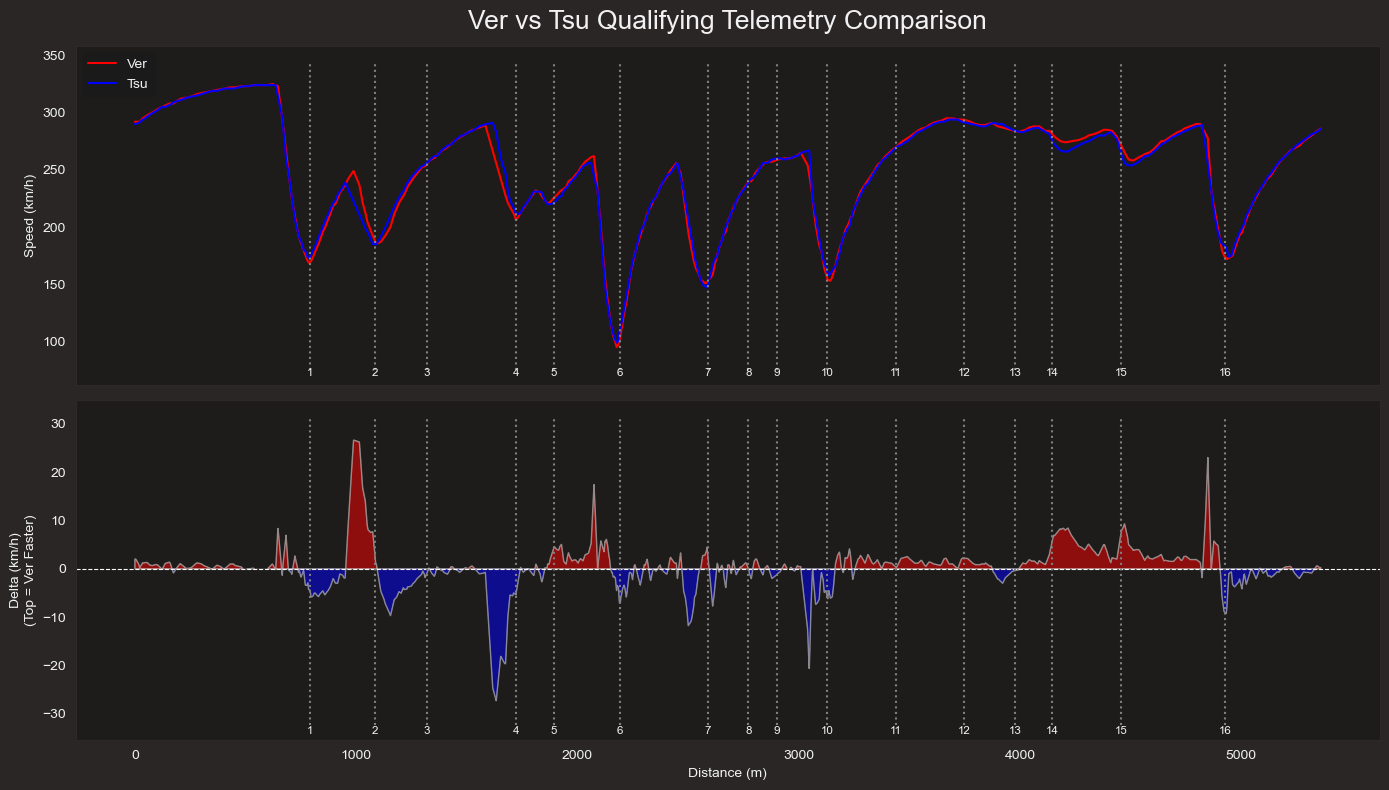

In [191]:
def plot_speed_analysis(delta_df, driver1_name="Driver 1", driver2_name="Driver 2", c1='cyan', c2='white'):
    """
    Plots speed traces and the delta between them.
    delta_df: The DataFrame returned from your calculate_speed_delta function.
    """
    
    # Create 2 subplots, sharing the X axis (Distance)
    # height_ratios=[3, 1] makes the speed plot 3x taller than the delta plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

    # --- TOP PLOT: Absolute Speeds ---
    ax1.plot(delta_df['Distance'], delta_df['Driver1_Speed'], color=c1, label=driver1_name)
    ax1.plot(delta_df['Distance'], delta_df['Driver2_Speed'], color=c2, label=driver2_name)
    ax1.set_ylabel('Speed (km/h)')
    ax1.set_title(f"{driver1_name} vs {driver2_name} Qualifying Telemetry Comparison")
    ax1.legend(loc='upper left')
    ax1.grid(False)
    v_min = delta_df['Driver1_Speed'].min()
    v_max = delta_df['Driver1_Speed'].max()
    ax1.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
                linestyles='dotted', colors='grey')
    for _, corner in circuit_info.corners.iterrows():
        txt = f"{corner['Number']}{corner['Letter']}"
        ax1.text(corner['Distance'], v_min-22, txt,
                va='center_baseline', ha='center', size='small')

    # --- BOTTOM PLOT: The Speed Delta ---
    # We plot the line itself
    ax2.plot(delta_df['Distance'], delta_df['Speed_Delta'], color='grey', linewidth=0.5, alpha=0.5)
    
    # FILL LOGIC: This is the "cool" part
    # Where Delta > 0 (Driver 1 is faster), fill with Driver 1's color
    ax2.fill_between(delta_df['Distance'], 0, delta_df['Speed_Delta'], 
                     where=(delta_df['Speed_Delta'] > 0), 
                     facecolor=c1, alpha=0.5, interpolate=True)
    
    # Where Delta < 0 (Driver 2 is faster), fill with Driver 2's color
    ax2.fill_between(delta_df['Distance'], 0, delta_df['Speed_Delta'], 
                     where=(delta_df['Speed_Delta'] < 0), 
                     facecolor=c2, alpha=0.5, interpolate=True)

    # Add a zero line for reference
    ax2.axhline(0, color='white', linewidth=0.8, linestyle='--')
    
    ax2.set_ylabel(f'Delta (km/h)\n(Top = {driver1_name} Faster)')
    ax2.set_xlabel('Distance (m)')
    ax2.grid(False)
    ax2.vlines(x=circuit_info.corners['Distance'], ymin=delta_df['Speed_Delta'].min()-5, ymax=delta_df['Speed_Delta'].max()+5,
                linestyles='dotted', colors='grey')
    for _, corner in circuit_info.corners.iterrows():
        txt = f"{corner['Number']}{corner['Letter']}"
        ax2.text(corner['Distance'], delta_df['Speed_Delta'].min()-6, txt,
                va='center_baseline', ha='center', size='small')

    plt.tight_layout()
    plt.show()

# Example Usage
# Assuming 'delta_data' is the result from the previous step
plot_speed_analysis(delta_data, driver1_name='Ver', driver2_name='Tsu', c1='red', c2='blue')

In [192]:
def calculate_time_delta(telemetry_driver_1, telemetry_driver_2):
    """
    Calculates the cumulative time difference (net advantage) over a lap.
    """
    # 1. Determine the maximum distance (use the shorter lap to avoid extrapolation errors)
    max_dist = min(telemetry_driver_1['Distance'].max(), telemetry_driver_2['Distance'].max())
    
    # 2. Create the common grid (0 to max_dist)
    common_distance = np.arange(0, max_dist, 1)
    
    # 3. CONVERSION STEP: Convert 'Time' to total seconds (floats)
    # We use .dt.total_seconds() for this
    t1_seconds = telemetry_driver_1['Time'].dt.total_seconds()
    t2_seconds = telemetry_driver_2['Time'].dt.total_seconds()
    
    # 4. Interpolate Time onto the common distance grid
    time_1_resampled = np.interp(common_distance, telemetry_driver_1['Distance'], t1_seconds)
    time_2_resampled = np.interp(common_distance, telemetry_driver_2['Distance'], t2_seconds)
    
    # 5. Calculate the Delta
    # If Result is POSITIVE (+): Driver 1 is slower (Time is higher)
    # If Result is NEGATIVE (-): Driver 1 is faster (Time is lower)
    time_delta = time_1_resampled - time_2_resampled
    
    return pd.DataFrame({
        'Distance': common_distance,
        'Time_Delta': time_delta
    })

In [193]:
def plot_time_delta(delta_df, driver1_name, driver2_name):
    fig, ax = plt.subplots(figsize=(12, 5))
    
    # We create the plot
    # NOTE: We multiply by -1 so that POSITIVE on the graph means Driver 1 is AHEAD
    # This is purely for visual intuition (Up = Good for Driver 1)
    ax.plot(delta_df['Distance'], -delta_df['Time_Delta'], color='white', linewidth=1.5)
    
    # Fill logic
    # Green area = Driver 1 is ahead of Driver 2
    ax.fill_between(delta_df['Distance'], 0, -delta_df['Time_Delta'], 
                    where=(-delta_df['Time_Delta'] > 0), 
                    facecolor='green', alpha=0.3, label=f'{driver1_name} Ahead')
    
    # Red area = Driver 1 is behind Driver 2
    ax.fill_between(delta_df['Distance'], 0, -delta_df['Time_Delta'], 
                    where=(-delta_df['Time_Delta'] < 0), 
                    facecolor='red', alpha=0.3, label=f'{driver2_name} Ahead')

    ax.axhline(0, color='grey', linestyle='--', linewidth=1)

    ax.vlines(x=circuit_info.corners['Distance'], ymin=-delta_df['Time_Delta'].max(), ymax=-delta_df['Time_Delta'].min(),
                linestyles='dotted', colors='grey')
    for _, corner in circuit_info.corners.iterrows():
        txt = f"{corner['Number']}{corner['Letter']}"
        ax.text(corner['Distance'], -delta_df['Time_Delta'].max()-0.02, txt,
                va='center_baseline', ha='center', size='small')
        
    ax.set_ylabel(f"<-- {driver2_name} Ahead | {driver1_name} Ahead -->\nTime Delta (s)")
    ax.set_xlabel("Distance (m)")
    ax.set_title(f"Net Time Advantage Qualifying: {driver1_name} vs {driver2_name}")
    ax.legend()

    ax.grid(True, alpha=0, axis='x')
    ax.grid(False, alpha=0.2, axis='y')

    plt.tight_layout()
    plt.show()

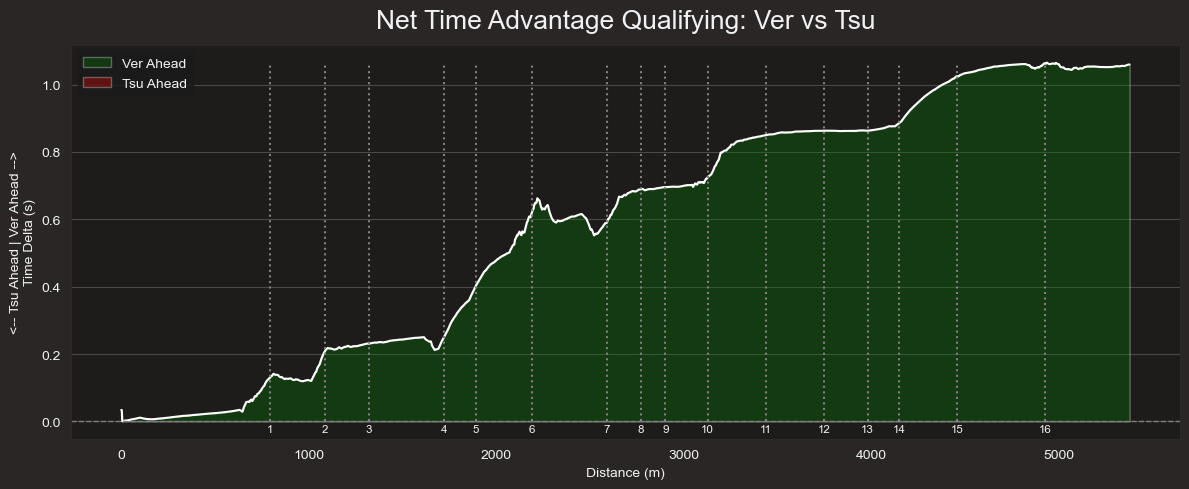

In [194]:
ver_fastest = q.laps.pick_drivers('Ver').pick_fastest()
ver_fastest = ver_fastest.get_car_data().add_distance()
tsu_fastest = q.laps.pick_drivers('Tsu').pick_fastest()
tsu_fastest = tsu_fastest.get_car_data().add_distance()

delta_data = calculate_time_delta(ver_fastest, tsu_fastest)
plot_time_delta(delta_data, driver1_name='Ver', driver2_name='Tsu')

In [180]:
sq = fastf1.get_session(2025, "Qatar", "Sprint Qualifying")
sq.load(telemetry=True)

events      WARNING 	Correcting user input 'Qatar' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Sprint Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	Sprint Qualifying is not supported by Ergast! Limited results are calculated from timing data.
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '14', '22', '1

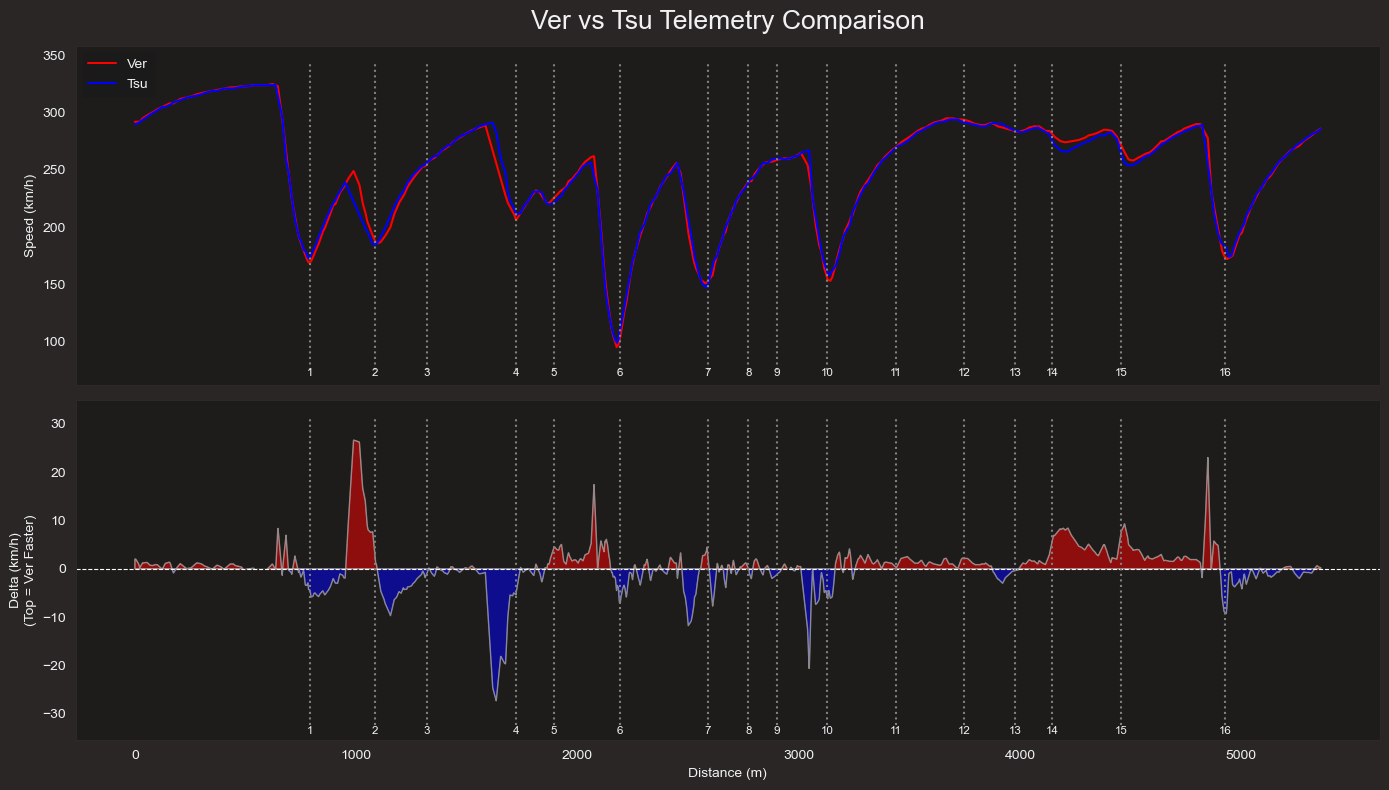

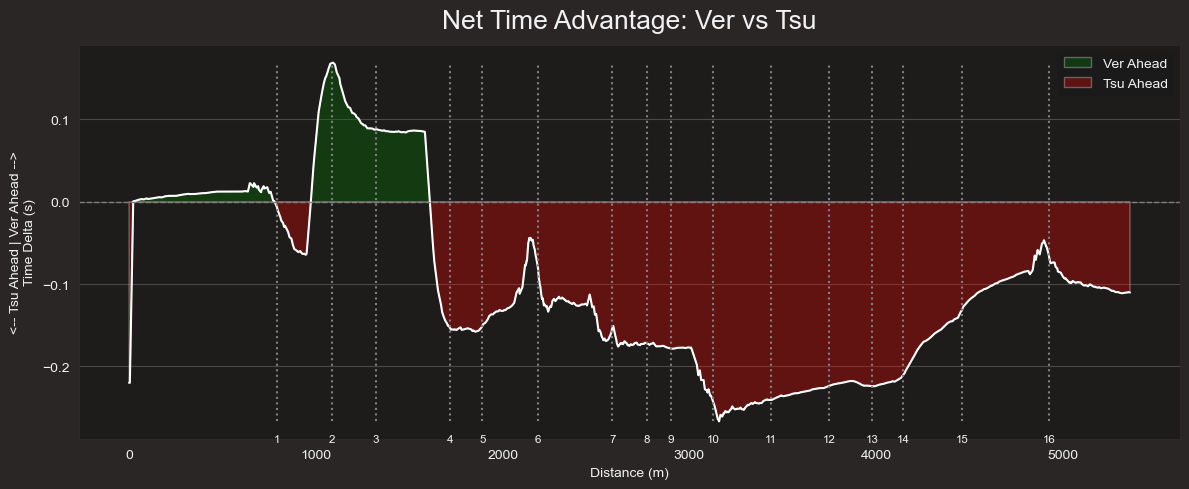

In [188]:
session_results = {}

for driver in ['Ver', 'TSU']:
    abb = sq.laps.pick_drivers(driver)['Driver'].iloc[0]
    driver_fastest = sq.laps.pick_drivers(driver).pick_fastest()
    driver_fastest = driver_fastest.get_car_data().add_distance()
    t = driver_fastest['Distance']
    vCar = driver_fastest["Speed"]
    session_results[abb] = [t, vCar]

ver_fastest = sq.laps.pick_drivers('Ver').pick_fastest()
ver_fastest = ver_fastest.get_car_data().add_distance()
tsu_fastest = sq.laps.pick_drivers('Tsu').pick_fastest()
tsu_fastest = tsu_fastest.get_car_data().add_distance()
delta_data = calculate_speed_delta(session_results['VER'], session_results['TSU'])
plot_speed_analysis(delta_data, driver1_name='Ver', driver2_name='Tsu', c1='red', c2='blue')
delta_data = calculate_time_delta(ver_fastest, tsu_fastest)
plot_time_delta(delta_data, driver1_name='Ver', driver2_name='Tsu')


In [206]:
df = pd.DataFrame(standings)
df.head()
race_points = df.groupby(['RoundNumber', 'EventName', 'Driver'])['Points'].sum().reset_index()
race_points = race_points.sort_values(by=['Driver', 'RoundNumber'])
race_points['Cumulative Points'] = race_points.groupby('Driver')['Points'].cumsum()
race_points

,RoundNumber,EventName,Driver,Points,Cumulative Points
0,1,Australian Grand Prix,ALB,10.0,10.0
20,2,Chinese Grand Prix,ALB,6.0,16.0
40,3,Japanese Grand Prix,ALB,2.0,18.0
60,4,Bahrain Grand Prix,ALB,0.0,18.0
80,5,Saudi Arabian Grand Prix,ALB,2.0,20.0
...,...,...,...,...,...
378,19,United States Grand Prix,VER,33.0,306.0
398,20,Mexico City Grand Prix,VER,15.0,321.0
418,21,São Paulo Grand Prix,VER,20.0,341.0
438,22,Las Vegas Grand Prix,VER,25.0,366.0


In [214]:
driver_palette = {driver: fastf1.plotting.get_driver_style(driver, session=race, style=['color', 'linestyle'], colormap="official")
                    for driver in ['HAM', "VER", "LEC"]}
driver_palette

{'HAM': {'color': '#ED1131', 'linestyle': 'dashed'},
 'VER': {'color': '#4781D7', 'linestyle': 'solid'},
 'LEC': {'color': '#ED1131', 'linestyle': 'solid'}}

{'LAW': {'color': '#6C98FF', 'linestyle': 'solid'}, 'TSU': {'color': '#4781D7', 'linestyle': 'dashed'}, 'HAD': {'color': '#6C98FF', 'linestyle': 'dashed'}}
{'color': 'blue', 'linestyle': '--'}
{'color': 'red', 'linestyle': '--'}
{'color': 'white', 'linestyle': '--'}


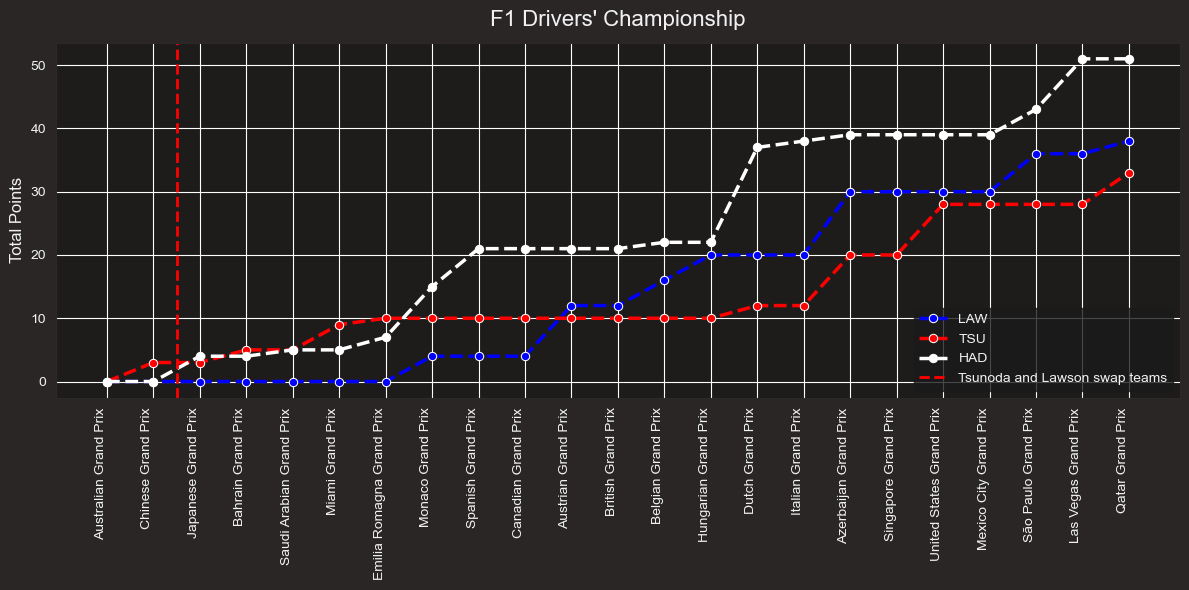

In [246]:
def graph_driver_season(drivers=[]):
    plt.figure(figsize=(12, 6))
    if drivers:
        driver_palette = {driver: fastf1.plotting.get_driver_style(driver, session=race, style=['color', 'linestyle'], colormap="official")
                    for driver in drivers}
        driver_points = race_points[race_points['Driver'].isin(drivers)]
    else:
        driver_palette = {driver: fastf1.plotting.get_driver_style(driver, session=race, style=['color', 'linestyle'], colormap="official")
                    for driver in race_points['Driver'].unique()}
        driver_points = race_points
        drivers = race_points['Driver'].unique()
    print(driver_palette)
    for driver in drivers:
        if driver == 'TSU':
            driver_palette[driver]['color'] = 'red'
            driver_palette[driver]['linestyle'] = '--'
        if driver == 'LAW':
            driver_palette[driver]['color'] = 'blue'
            driver_palette[driver]['linestyle'] = '--'
        if driver == 'HAD':
            driver_palette[driver]['color'] = 'white'
            driver_palette[driver]['linestyle'] = '--'
        print(driver_palette[driver])
        sns.lineplot(
            data=driver_points[driver_points['Driver'] == driver],
            x='RoundNumber',
            y='Cumulative Points',
            marker='o',
            linewidth=2.5,
            linestyle=driver_palette[driver]['linestyle'], 
            color=driver_palette[driver]['color'],
            label=driver
        )
    plt.axvline(2.5, color='red', linestyle='--', linewidth=2, label='Tsunoda and Lawson swap teams')
    plt.title("F1 Drivers' Championship", fontsize=16)
    plt.xlabel('')
    plt.ylabel("Total Points", fontsize=12)
    plt.legend()

    # Optional: Set X-ticks to be the Race Names if they aren't too crowded
    unique_races = race_points[['RoundNumber', 'EventName']].drop_duplicates().sort_values('RoundNumber')
    plt.xticks(unique_races['RoundNumber'], unique_races['EventName'], rotation=90, ha='right')

    plt.tight_layout()
    plt.show()
graph_driver_season(['LAW', 'TSU', 'HAD'])